1. ¿Podemos dar solución a un problema con datos? Elige un tema.
1. Busca y consigue los datos. Vuelta al anterior punto si nos quedamos sin ideas.
1. Define tu problema de Machine Learning: clasificación/regresión, supervisado/ no supervisado, series temporales, imágenes, texto...
1. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.
1. Limpia los datos: duplicados, missings, outliers, columnas inútiles...
1. Feature engineering: transformación y creación de nuevas variables.
1. Prueba varios modelos
1. Analiza los resultados mediante una métrica adecuada a tu problemática.
1. Interpreta los resultados y comprende los outputs del modelo.
1. Siguientes pasos. ¿Se podría seguir enriqueciendo el modelo con otras pruebas o con otros datos?

# 1. Introducción



Prediccion del talento futbolistico
"Es posible predecir el talento futbolistico apartir de los juegos del FIFA?"

hipotesis = "El juego del FIFA es una herramienta util para la deteccion de talento futbolistico"

# 2. Descripción de los Datos
Los datos se componen de un archivo csv maleplayers.csv de 180021 filas x 109 columnas

Vamos a tratar de entender la estructura de los datos asi como sus faltantes y duplicados.

# 2. Carga de librerias

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


# 3. Carga de librerias

In [5]:
# guarda en variables los datasets y su fuente
futbol = pd.read_csv('data/male_players.csv')

C:\Users\aprai\AppData\Local\Temp\ipykernel_15860\367689262.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  futbol = pd.read_csv('data/male_players.csv')


# 4.Descripcion de los datos

In [6]:
futbol.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [7]:
futbol.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,...,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,...,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,...,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,...,50.000000,26.000000,27.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,30.000000
50%,222734.000000,20.000000,2.0,66.000000,71.000000,7.500000e+05,4000.00000,25.000000,181.000000,75.000000,...,59.000000,51.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,40.000000
75%,239858.000000,22.000000,2.0,70.000000,75.000000,1.800000e+06,10000.00000,28.000000,186.000000,80.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,46.000000
max,278145.000000,24.000000,2.0,94.000000,95.000000,1.940000e+08,575000.00000,54.000000,208.000000,110.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


In [8]:
futbol.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 109 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    player_id                       180021 non-null  int64  
 1    player_url                      180021 non-null  object 
 2    fifa_version                    180021 non-null  float64
 3    fifa_update                     180021 non-null  float64
 4    update_as_of                    180021 non-null  object 
 5    short_name                      180021 non-null  object 
 6    long_name                       180021 non-null  object 
 7    player_positions                180021 non-null  object 
 8    overall                         180021 non-null  int64  
 9    potential                       180021 non-null  int64  
 10   value_eur                       177868 non-null  float64
 11   wage_eur                        178173 non-null  float64
 12   

In [9]:
print(futbol.shape)

(180021, 109)


In [10]:
futbol.dtypes

player_id         int64
player_url       object
fifa_version    float64
fifa_update     float64
update_as_of     object
                 ...   
lcb              object
cb               object
rcb              object
rb               object
gk               object
Length: 109, dtype: object

# 5.Problema Machine Learning

# 6. Divide en train y test

# 5.Limpieza de datos

Seleccionamos las columnas que vamos a utilizar de un total de 109 nos quedamos con 26 que son las columnas que manejaremos.

In [11]:
futbol_1 = futbol[[#'player_id', 
 # 'player_url',
 #'fifa_version',
 #'fifa_update', 'update_as_of',
 #'short_name',  #'long_name', 
 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
 # 'dob',  
 'height_cm', 'weight_kg', #'club_team_id',
 #'club_name',
 #'league_id',
 #'league_name', 'league_level', 'club_position',
 # 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
 #'nationality_name',
 # 'nation_team_id',
 #'nation_position',
 # 'nation_jersey_number', 
 'preferred_foot', #'weak_foot', 'skill_moves',
 #'international_reputation',
 # 'work_rate', 'body_type', 'real_face', 
 'release_clause_eur', 
 # 'player_tags', 'player_traits', 
 'pace', 
 'shooting',
 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
 'mentality_interceptions', 'mentality_positioning',  'mentality_vision', 'mentality_penalties', 'mentality_composure',
 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'
            ]].copy()

In [12]:
futbol_1.nunique()

player_positions    2031
overall               55
potential             54
value_eur            341
wage_eur             154
                    ... 
lcb                  475
cb                   475
rcb                  475
rb                   393
gk                   297
Length: 78, dtype: int64

In [13]:
futbol_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_positions             180021 non-null  object 
 1   overall                      180021 non-null  int64  
 2   potential                    180021 non-null  int64  
 3   value_eur                    177868 non-null  float64
 4   wage_eur                     178173 non-null  float64
 5   age                          180021 non-null  int64  
 6   height_cm                    180021 non-null  int64  
 7   weight_kg                    180021 non-null  int64  
 8   preferred_foot               180021 non-null  object 
 9   release_clause_eur           120722 non-null  float64
 10  pace                         159997 non-null  float64
 11  shooting                     159997 non-null  float64
 12  passing                      159997 non-null  float64
 13 

In [14]:
# Eliminar columnas de tipo object
df_numerico = futbol_1.select_dtypes(exclude=['object'])

print(df_numerico)

        overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0            91         94  181500000.0  230000.0   24        182         75   
1            91         94  185000000.0  340000.0   22        195         94   
2            91         91  103000000.0  350000.0   32        181         75   
3            90         90   41000000.0   23000.0   36        169         67   
4            90         90   51000000.0   95000.0   35        185         81   
...         ...        ...          ...       ...  ...        ...        ...   
180016       41         61      20000.0    2000.0   17        187         81   
180017       41         50      30000.0    2000.0   17        178         57   
180018       40         50      15000.0    2000.0   18        190         76   
180019       40         49      15000.0    2000.0   22        180         70   
180020       40         40          NaN    2000.0   41        175         72   

        release_clause_eur  pace  shoot

In [15]:
df_filled = df_numerico.fillna(df_numerico.median(numeric_only=True))
print(df_filled)

        overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0            91         94  181500000.0  230000.0   24        182         75   
1            91         94  185000000.0  340000.0   22        195         94   
2            91         91  103000000.0  350000.0   32        181         75   
3            90         90   41000000.0   23000.0   36        169         67   
4            90         90   51000000.0   95000.0   35        185         81   
...         ...        ...          ...       ...  ...        ...        ...   
180016       41         61      20000.0    2000.0   17        187         81   
180017       41         50      30000.0    2000.0   17        178         57   
180018       40         50      15000.0    2000.0   18        190         76   
180019       40         49      15000.0    2000.0   22        180         70   
180020       40         40     750000.0    2000.0   41        175         72   

        release_clause_eur  pace  shoot

In [16]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   overall                      180021 non-null  int64  
 1   potential                    180021 non-null  int64  
 2   value_eur                    180021 non-null  float64
 3   wage_eur                     180021 non-null  float64
 4   age                          180021 non-null  int64  
 5   height_cm                    180021 non-null  int64  
 6   weight_kg                    180021 non-null  int64  
 7   release_clause_eur           180021 non-null  float64
 8   pace                         180021 non-null  float64
 9   shooting                     180021 non-null  float64
 10  passing                      180021 non-null  float64
 11  dribbling                    180021 non-null  float64
 12  defending                    180021 non-null  float64
 13 

In [17]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_filled)
df_scaled

array([[9.44444444e-01, 9.81818182e-01, 9.35566678e-01, ...,
        1.09890110e-01, 5.37634409e-02, 5.00000000e-01],
       [9.44444444e-01, 9.81818182e-01, 9.53608008e-01, ...,
        1.09890110e-01, 6.45161290e-02, 5.00000000e-01],
       [9.44444444e-01, 9.27272727e-01, 5.30925417e-01, ...,
        9.89010989e-02, 1.29032258e-01, 5.00000000e-01],
       ...,
       [0.00000000e+00, 1.81818182e-01, 7.21653204e-05, ...,
        9.89010989e-02, 8.60215054e-02, 5.00000000e-01],
       [0.00000000e+00, 1.63636364e-01, 7.21653204e-05, ...,
        1.09890110e-01, 8.60215054e-02, 5.00000000e-01],
       [0.00000000e+00, 0.00000000e+00, 3.86084464e-03, ...,
        7.69230769e-02, 1.29032258e-01, 5.00000000e-01]])

<Axes: >

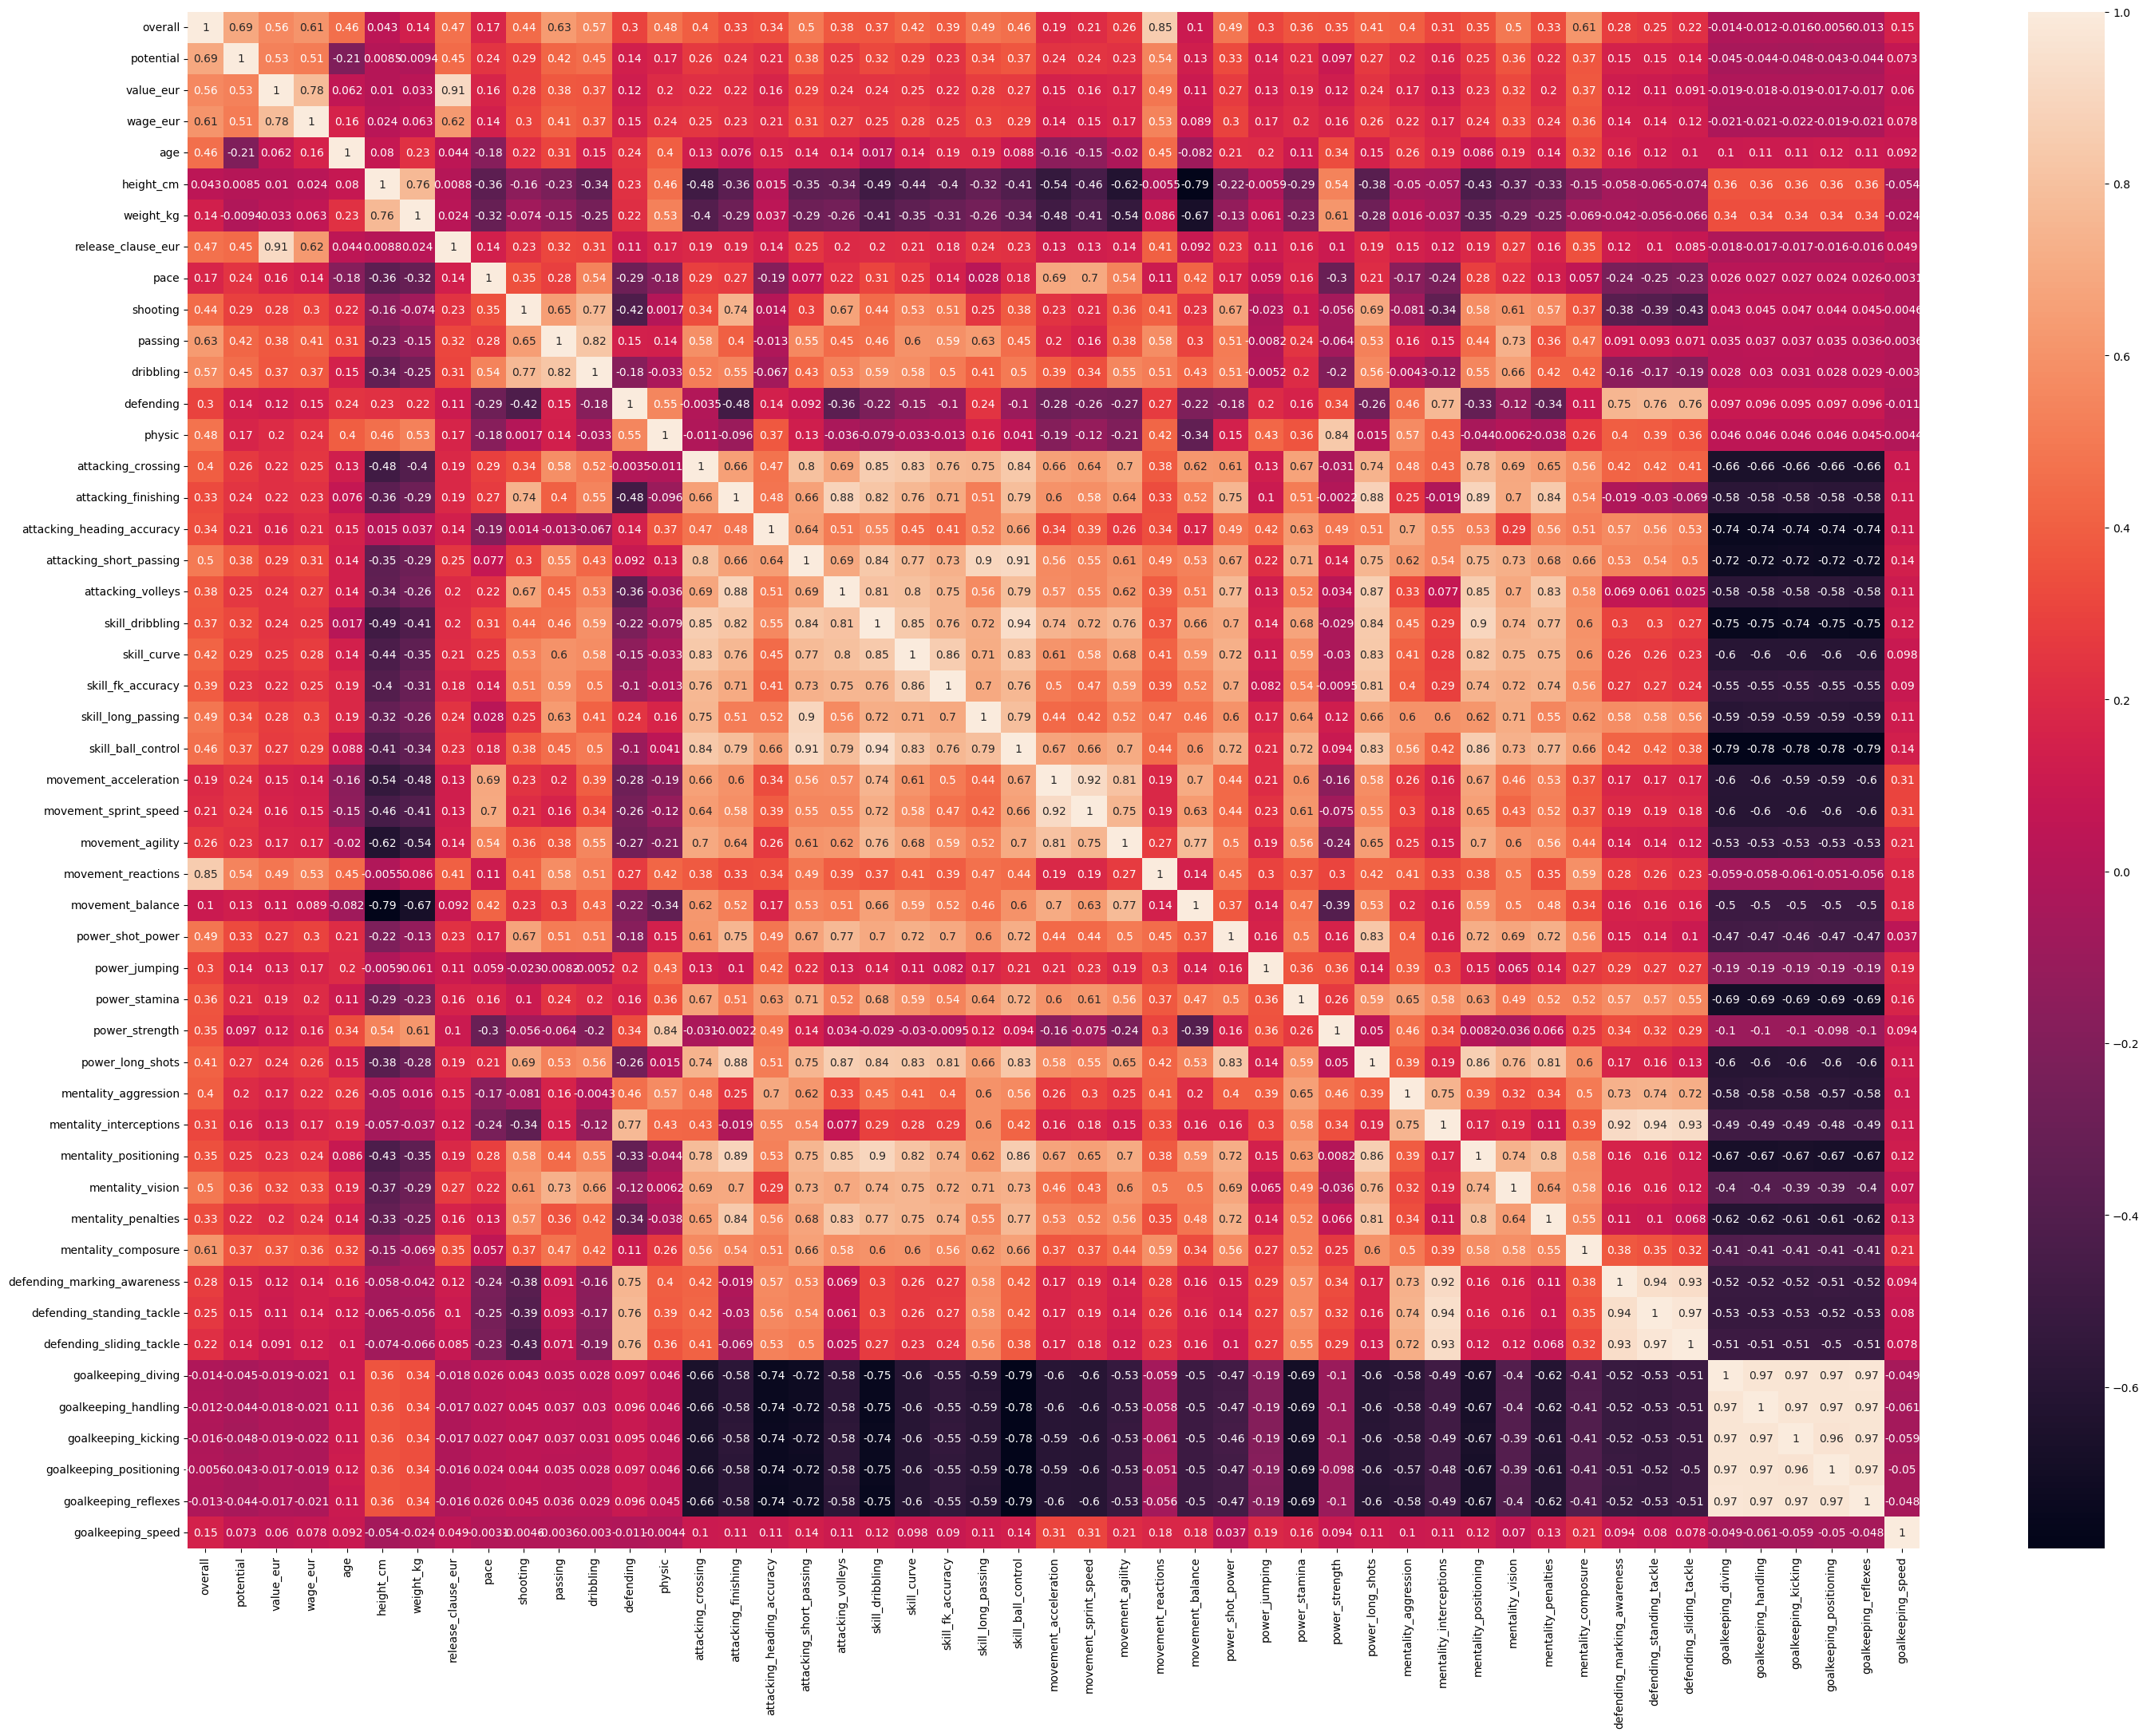

In [18]:
plt.figure(figsize=(35,25))
sns.heatmap(df_filled.corr(numeric_only=True), annot=True)

In [19]:
from sklearn.model_selection import train_test_split
X = df_filled.drop(columns=["overall"])  # Features (excluding target)
y = df_filled["overall"]  # Target (player rating)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Get the feature importances
feature_importance = model.feature_importances_
print(feature_importance)



KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.4339477850298571


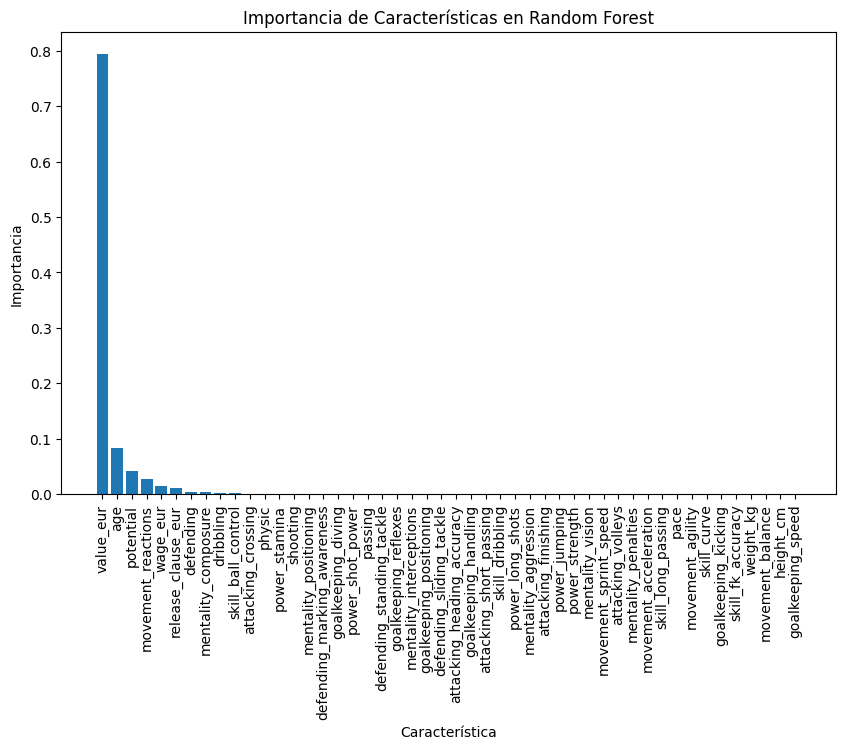

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las importancias de las características
feature_importance = model.feature_importances_

# Ordenar características por importancia
indices = np.argsort(feature_importance)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Característica")
plt.ylabel("Importancia")
plt.title("Importancia de Características en Random Forest")
plt.show()


Regresion y randomforest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filtramos filas con valores nulos en la columna 'overall'
df_clean = df_filled.dropna(subset=['overall'])

# Selección de características
features = ['potential','value_eur','wage_eur','age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df_clean[features]
y = df_clean['overall']  # Target (objetivo)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


NameError: name 'df_filled' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Modelo de Random Forest (más robusto)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predicciones
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluación
print("MAE - Regresión Lineal:", mean_absolute_error(y_test, lr_preds))
print("MAE - Random Forest:", mean_absolute_error(y_test, rf_preds))

print("R² - Regresión Lineal:", r2_score(y_test, lr_preds))
print("R² - Random Forest:", r2_score(y_test, rf_preds))


MAE - Regresión Lineal: 1.740302344438714
MAE - Random Forest: 0.43763058350096273
R² - Regresión Lineal: 0.8963506082178611
R² - Random Forest: 0.9885378810962667


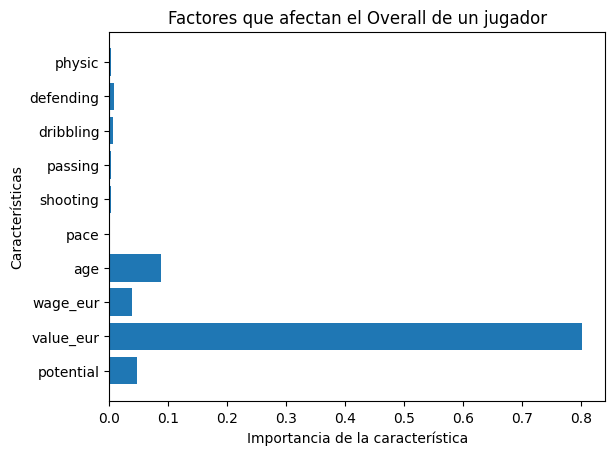

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Importancia de características en Random Forest
importance = rf_model.feature_importances_
features_np = np.array(features)

plt.barh(features_np, importance)
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title("Factores que afectan el Overall de un jugador")
plt.show()


In [ ]:
new_player = [[90, 25, 85, 78, 80, 82, 75, 88,1000000,100000]]  # Ejemplo de jugador
new_player_scaled = scaler.transform(new_player)

predicted_overall = rf_model.predict(new_player_scaled)
print("Predicción del Overall:", predicted_overall[0])


Predicción del Overall: 72.92


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100],  # Número de árboles en el bosque
    'max_depth': [10],  # Profundidad máxima de cada árbol
    'min_samples_split': [5],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2]  # Número mínimo de muestras en cada hoja
}


In [ ]:
# Definir la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Extraer el mejor modelo
best_rf_model = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
rf_preds = best_rf_model.predict(X_test_scaled)

# Evaluación del modelo
from sklearn.metrics import mean_absolute_error, r2_score

print("MAE - Mejor Random Forest:", mean_absolute_error(y_test, rf_preds))
print("R² - Mejor Random Forest:", r2_score(y_test, rf_preds))


MAE - Mejor Random Forest: 0.6765641824322626
R² - Mejor Random Forest: 0.97861146575505


In [ ]:
new_player = [[90, 25, 85, 78, 80, 82, 75, 88,1000000,100000]]  # Ejemplo de jugador
new_player_scaled = scaler.transform(new_player)

predicted_overall = best_rf_model.predict(new_player_scaled)
print("Predicción del Overall:", predicted_overall[0])


Predicción del Overall: 72.70197619047619


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


XGboost

In [ ]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [ ]:
# Filtrar filas con valores nulos en la columna 'overall'
df_clean = futbol.dropna(subset=['overall'])

# Selección de características
features = ['potential','value_eur','wage_eur', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df_clean[features]
y = df_clean['overall']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predicciones
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluación
print("MAE - XGBoost:", mean_absolute_error(y_test, xgb_preds))
print("R² - XGBoost:", r2_score(y_test, xgb_preds))


MAE - XGBoost: 0.6148181557655334
R² - XGBoost: 0.9844834208488464


In [ ]:
new_player = [[90, 25, 85, 78, 80, 82, 75, 88,1000000,100000]]  # Ejemplo de jugador
new_player_scaled = scaler.transform(new_player)

predicted_overall = xgb_model.predict(new_player_scaled)
print("Predicción del Overall:", predicted_overall[0])


Predicción del Overall: 75.304634


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


gradient boosting

In [ ]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd


In [ ]:
# Filtrar filas con valores nulos en la columna 'overall'
df_clean = df_filled.dropna(subset=['overall'])

# Selección de características
features = ['potential','value_eur','wage_eur', 'age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df_clean[features]
y = df_clean['overall']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Definir el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

# Entrenar el modelo
gb_model.fit(X_train_scaled, y_train)

# Generar predicciones
y_pred = gb_model.predict(X_test_scaled)


print("MAE - GradientBoostingRegressor", mean_absolute_error(y_test, y_pred))
print("R² - GradientBoostingRegressor", r2_score(y_test, y_pred))


MAE - GradientBoostingRegressor 0.6358530403139907
R² - GradientBoostingRegressor 0.9840761473774272


In [ ]:
new_player = [[90, 25, 85, 78, 80, 82, 75, 88,1000000,100000]]  # Datos ficticios
new_player_scaled = scaler.transform(new_player)

predicted_overall = gb_model.predict(new_player_scaled)
print("Predicción del Overall:", predicted_overall[0])


Predicción del Overall: 83.52685682795804


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SVR

Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_preds = ridge_model.predict(X_test_scaled)
print("MAE - Ridge Regression:", mean_absolute_error(y_test, ridge_preds))
print("R² - Ridge Regression:", r2_score(y_test, ridge_preds))


MAE - Ridge Regression: 1.740301017863083
R² - Ridge Regression: 0.8963506244656486


LightGBM

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
lgb_model.fit(X_train_scaled, y_train)

lgb_preds = lgb_model.predict(X_test_scaled)
print("MAE - LightGBM:", mean_absolute_error(y_test, lgb_preds))
print("R² - LightGBM:", r2_score(y_test, lgb_preds))


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, c

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 144016, number of used features: 10
[LightGBM] [Info] Start training from score 65.732745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


RandomizedSearchCV para Optimización

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

random_search = RandomizedSearchCV(lgb.LGBMRegressor(), param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 96010, number of used features: 10
[LightGBM] [Info] Start training from score 65.709884


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.756476


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 96010, number of used features: 10
[LightGBM] [Info] Start training from score 65.709884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.756476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 96010, number of used features: 10
[LightGBM] [Info] Start training from score 65.709884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.756476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 96010, number of used features: 10
[LightGBM] [Info] Start training from score 65.709884


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.756476


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 96010, number of used features: 10
[LightGBM] [Info] Start training from score 65.709884


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.756476


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 96010, number of used features: 10
[LightGBM] [Info] Start training from score 65.709884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.756476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 96010, number of used features: 10
[LightGBM] [Info] Start training from score 65.709884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.756476


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 96011, number of used features: 10
[LightGBM] [Info] Start training from score 65.731874


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 144016, number of used features: 10
[LightGBM] [Info] Start training from score 65.732745
Mejores hiperparámetros: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}


In [ ]:
# Entrenar el modelo antes de hacer predicciones
rf_model.fit(X_train_scaled, y_train)

# Ahora sí puedes hacer predicciones
rf_preds = rf_model.predict(X_test_scaled)

# Calcular MAE
rf_mae = mean_absolute_error(y_test, rf_preds)
print("MAE - Random Forest:", rf_mae)


MAE - Random Forest: 0.43763058350096273


In [ ]:
import pandas as pd

# Crear un diccionario con los valores MAE de distintos modelos
mae_scores = {
    "Gradient Boosting": mean_absolute_error(y_test, gb_model.predict(X_test_scaled)),
    "Random Forest": mean_absolute_error(y_test, rf_model.predict(X_test_scaled)),
    "XGBoost": mean_absolute_error(y_test, xgb_model.predict(X_test_scaled)),
    "Linear Regression": mean_absolute_error(y_test, lr_model.predict(X_test_scaled)),
    "Ridge Regression": mean_absolute_error(y_test, ridge_preds),
    "LightGBM": mean_absolute_error(y_test, lgb_preds)
}

# Convertir en un DataFrame de pandas
mae_df = pd.DataFrame(mae_scores.items(), columns=["Modelo", "MAE"])

# Mostrar la tabla
print(mae_df)


              Modelo       MAE
0  Gradient Boosting  0.635853
1      Random Forest  0.437631
2            XGBoost  0.746543
3  Linear Regression  1.740302
4   Ridge Regression  1.740301
5           LightGBM  0.640547


In [ ]:
# Comparar errores
train_mae = mean_absolute_error(y_train, rf_model.predict(X_train_scaled))
test_mae = mean_absolute_error(y_test, rf_model.predict(X_test_scaled))

print(f"MAE - Entrenamiento: {train_mae:.4f}")
print(f"MAE - Prueba: {test_mae:.4f}")


MAE - Entrenamiento: 0.1677
MAE - Prueba: 0.4376


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_absolute_error")
print(f"MAE promedio en validación cruzada: {-cv_scores.mean():.4f}")


MAE promedio en validación cruzada: 0.4508
